# Artificial Neural Network Heuristic: performance analysis

In this notebook, we analyze the performance of the first ANN heuristic that we trained. The ANN is a feed-forward fully-connected neural network composed of an input layer with 256 neurons, five hidden layers with 1024, 1024, 512, 128 and 64 neurons, and an output layer composed of a single neuron. An input is a board state (16 indexes of pebbles, with each index one-hot encoded, resulting in a 256-dimensional input vector). The target value for each input is the length of its optimal solution.

The neural network was trained on a dataset of roughly 6 million optimal solutions, with distribution similar to a distribution created by randomly permutating the board pebbles (and discarding unsolvable results).

The tests were run on boards created by random permutations. **The same dataset (with about 75 boards) was used for testing three different heuristics**, which are described in their corresponding sections. The algorithm used for searching is A*.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

%matplotlib inline
%config InlineBackend.figure_format='retina'

## Data preprocessing

In [2]:
results = pd.read_csv("/home/batman/code/fifteen-puzzle/data/experiments/ann-heuristic-benchmark.csv")
results.shape

(221, 9)

In [3]:
results.head(10)

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION
0,2019-03-18 10:16:19.765190 PID23250,1,A*,PDB[Pat:5],RND,0.921609,49,6696,43.000000
1,2019-03-18 10:16:19.772191 PID23252,1,A*,PDB[Pat:5],RND,1.239359,46,9477,40.000000
2,2019-03-18 10:16:19.783919 PID23253,1,A*,PDB[Pat:5],RND,1.365097,48,7872,42.000000
3,2019-03-18 10:16:19.811900 PID23262,1,A*,PDB[Pat:5],RND,2.115139,38,14756,30.000000
4,2019-03-18 10:16:19.759208 PID23243,1,A*,PDB[Pat:5],RND,4.059638,48,18718,38.000000
5,2019-03-18 10:16:19.773334 PID23248,1,A*,PDB[Pat:5],RND,4.679295,46,24641,38.000000
6,2019-03-18 10:16:19.786292 PID23258,1,A*,PDB[Pat:5],RND,8.056643,49,40082,41.000000
7,2019-03-18 10:16:19.780042 PID23254,1,A*,PDB[Pat:5],RND,14.105577,54,60798,44.000000
8,2019-03-18 10:16:19.772191 PID23252,1,A*,ANN[Const:-2],RND,3.800127,46,270,48.533722
9,2019-03-18 10:16:19.783919 PID23253,1,A*,ANN[Const:-2],RND,11.210799,48,916,47.230282


In [4]:
results["HEURISTIC_NAME"].unique()

array(['PDB[Pat:5]', 'ANN[Const:-2]', 'ANN[Const:0]'], dtype=object)

In [5]:
pdb_results = results[results["HEURISTIC_NAME"] == "PDB[Pat:5]"]
ann_results = results[results["HEURISTIC_NAME"] == "ANN[Const:0]"]
ann_add_const_results = results[results["HEURISTIC_NAME"] == "ANN[Const:-2]"]

In [6]:
def optimal_cost(row):
    process_id = row["PROCESS_ID"]
    board_id = row["BOARD_ID"]
    
    pdb_row_df = pdb_results[(pdb_results.PROCESS_ID == process_id) & (pdb_results.BOARD_ID == board_id)]
    return pdb_row_df.iloc[0]["SOLUTION_COST"]

In [7]:
results_complete = results.copy()

results_complete["OPTIMAL_SOLUTION_COST"] = results_complete.apply(lambda row: optimal_cost(row), axis=1)
results_complete["SOLUTION_COST_ERROR"] = results_complete["SOLUTION_COST"] - results_complete["OPTIMAL_SOLUTION_COST"]
results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"] = results_complete["INITIAL_HEURISTIC_PREDICTION"] - results_complete["OPTIMAL_SOLUTION_COST"]

In [49]:
results_complete.head()

,PROCESS_ID,BOARD_ID,ALGORITHM_NAME,HEURISTIC_NAME,BOARDS_GENERATOR_NAME,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
0,2019-03-18 10:16:19.765190 PID23250,1,A*,PDB[Pat:5],RND,0.921609,49,6696,43.0,49,0,-6.0
1,2019-03-18 10:16:19.772191 PID23252,1,A*,PDB[Pat:5],RND,1.239359,46,9477,40.0,46,0,-6.0
2,2019-03-18 10:16:19.783919 PID23253,1,A*,PDB[Pat:5],RND,1.365097,48,7872,42.0,48,0,-6.0
3,2019-03-18 10:16:19.811900 PID23262,1,A*,PDB[Pat:5],RND,2.115139,38,14756,30.0,38,0,-8.0
4,2019-03-18 10:16:19.759208 PID23243,1,A*,PDB[Pat:5],RND,4.059638,48,18718,38.0,48,0,-10.0


In [9]:
pdb_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "PDB[Pat:5]"]
ann_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Const:0]"]
ann_add_const_results_complete = results_complete[results_complete["HEURISTIC_NAME"] == "ANN[Const:-2]"]

## Analysis of results

Text(0.5, 0, 'optimal solution length')

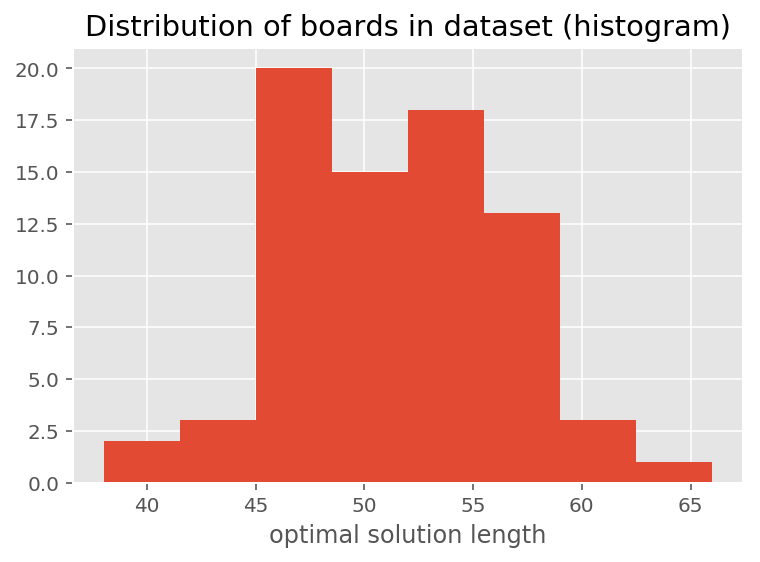

In [46]:
plt.hist(pdb_results["SOLUTION_COST"], bins=8);
plt.title("Distribution of boards in dataset (histogram)")
plt.xlabel("optimal solution length")

### Pattern Database Heuristic (5, 5, 5) - optimal solutions

A pattern database heuristic with 3 patterns of size 5. Usage with A* guarantees optimal results.

In [10]:
pdb_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,75.000000,75.000000,75.000000,7.500000e+01,75.000000,75.000000,75.0,75.000000
mean,2.613333,750.622772,51.066667,9.007757e+05,40.373333,51.066667,0.0,-10.693333
std,1.683732,1025.158292,5.038590,3.469431e+06,4.450245,5.038590,0.0,2.760598
min,1.000000,0.921609,38.000000,4.045000e+03,30.000000,38.000000,0.0,-18.000000
25%,1.000000,70.478209,47.000000,4.466200e+04,38.000000,47.000000,0.0,-12.000000
50%,2.000000,296.982539,51.000000,1.780660e+05,40.000000,51.000000,0.0,-10.000000
75%,3.500000,968.634909,54.000000,5.977255e+05,43.500000,54.000000,0.0,-8.000000
max,8.000000,4642.603182,66.000000,2.634350e+07,50.000000,66.000000,0.0,-6.000000


### Artificial Neural Network Heuristic

Improvements over the PDB heuristic:
- Average runtime: 347 s (vs 750 s)
- Average expanded nodes count: 10K (vs 0.9M)

Limitations:
- Small solution length error (standard deviation: 1.05)

In [11]:
ann_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2.589041,347.019031,51.575342,10045.013699,51.183076,50.945205,0.630137,0.237870
std,1.698329,428.108545,5.090617,13556.325285,5.186149,5.046700,1.047575,1.697125
min,1.000000,6.725801,38.000000,225.000000,37.134007,38.000000,0.000000,-2.941002
25%,1.000000,84.897011,48.000000,2171.000000,47.810585,47.000000,0.000000,-1.004677
50%,2.000000,184.204371,51.000000,4781.000000,51.274147,51.000000,0.000000,0.121681
75%,3.000000,403.898095,55.000000,11956.000000,55.203773,54.000000,2.000000,1.426552
max,8.000000,2054.381989,66.000000,67573.000000,66.748535,66.000000,4.000000,4.693413


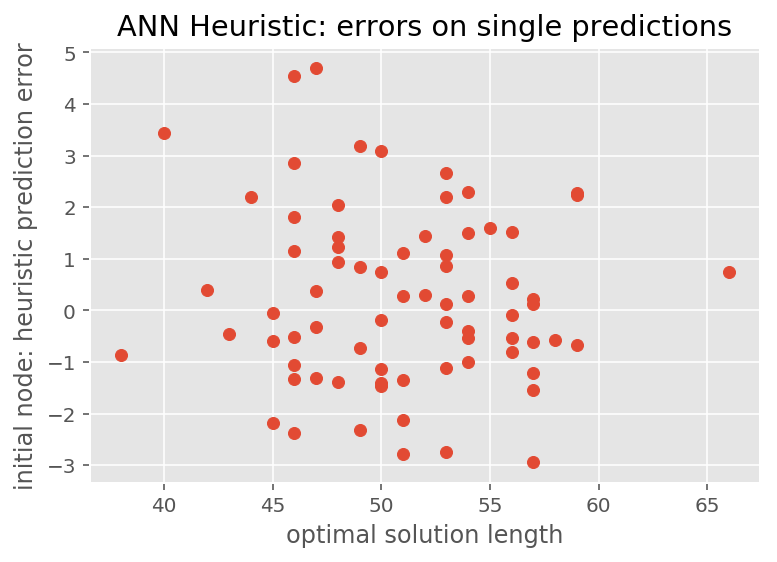

In [39]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["INITIAL_HEURISTIC_PREDICTION_ERROR"])
plt.title("ANN Heuristic: errors on single predictions")
plt.xlabel("optimal solution length")
plt.ylabel("initial node: heuristic prediction error");

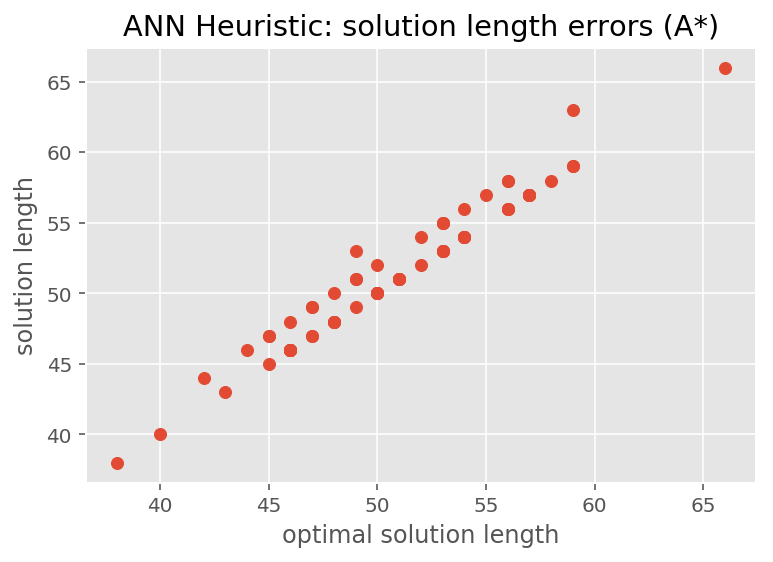

In [44]:
plt.scatter(ann_results_complete["OPTIMAL_SOLUTION_COST"], ann_results_complete["SOLUTION_COST"])
plt.title("ANN Heuristic: solution length errors (A*)")
plt.xlabel("optimal solution length")
plt.ylabel("solution length");

### Artificial Neural Network Heuristic (additive constant -2)

Subtracting a small constant from the ANN heuristic predictions added no benefit. Further experiments with a smaller constant will be conducted.

In [12]:
ann_add_const_results_complete.describe()

,BOARD_ID,RUN_TIME,SOLUTION_COST,EXPANDED_NODES,INITIAL_HEURISTIC_PREDICTION,OPTIMAL_SOLUTION_COST,SOLUTION_COST_ERROR,INITIAL_HEURISTIC_PREDICTION_ERROR
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000
mean,2.589041,336.743119,51.575342,10045.013699,49.183076,50.945205,0.630137,-1.762130
std,1.698329,451.827812,5.090617,13556.325285,5.186149,5.046700,1.047575,1.697125
min,1.000000,3.800127,38.000000,225.000000,35.134007,38.000000,0.000000,-4.941002
25%,1.000000,70.691770,48.000000,2171.000000,45.810585,47.000000,0.000000,-3.004677
50%,2.000000,158.016346,51.000000,4781.000000,49.274147,51.000000,0.000000,-1.878319
75%,3.000000,376.345007,55.000000,11956.000000,53.203773,54.000000,2.000000,-0.573448
max,8.000000,2220.624066,66.000000,67573.000000,64.748535,66.000000,4.000000,2.693413


## (Unused code)

In [22]:
# results_wide = (
#     results[results.ALGORITHM_NAME == 'A*']
#     .drop('ALGORITHM_NAME', 1)
#     .pivot(index='BOARD_ID', columns='HEURISTIC_NAME')
# )

In [46]:
# groups = dict(list(results.groupby(['ALGORITHM_NAME', 'HEURISTIC_NAME'])))
# groups.keys()

dict_keys([('AStarSearch', 'ANNHeuristic[Additive constant: -2]'), ('AStarSearch', 'ANNHeuristic[Additive constant: 0]'), ('AStarSearch', 'ANNHeuristic[Additive constant: 2]'), ('AStarSearch', 'PatternDatabaseHeuristic'), ('IDAStarSearch', 'ANNHeuristic[Additive constant: -2]'), ('IDAStarSearch', 'ANNHeuristic[Additive constant: 0]'), ('IDAStarSearch', 'ANNHeuristic[Additive constant: 2]'), ('IDAStarSearch', 'PatternDatabaseHeuristic')])

In [27]:
# results.groupby(['ALGORITHM_NAME', 'HEURISTIC_NAME']).mean()

BOARD_ID  RUN_TIME  \
ALGORITHM_NAME HEURISTIC_NAME                                            
AStarSearch    ANNHeuristic[Additive constant: -2]      15.5  0.411816   
               ANNHeuristic[Additive constant: 0]       15.5  0.406954   
               ANNHeuristic[Additive constant: 2]       15.5  0.401545   
               PatternDatabaseHeuristic                 15.5  0.018106   
IDAStarSearch  ANNHeuristic[Additive constant: -2]      15.5  1.231351   
               ANNHeuristic[Additive constant: 0]       15.5  1.264256   
               ANNHeuristic[Additive constant: 2]       15.0  1.251357   
               PatternDatabaseHeuristic                 15.5  0.015557   

                                                    SOLUTION_COST  \
ALGORITHM_NAME HEURISTIC_NAME                                       
AStarSearch    ANNHeuristic[Additive constant: -2]      19.000000   
               ANNHeuristic[Additive constant: 0]       19.000000   
               ANNHeuristic[Additive constant: 2]       19.000000   
               PatternDatabaseHeuristic                 19.000000   
IDAStarSearch  ANNHeuristic[Additive constant: -2]      23.000000   
               ANNHeuristic[Additive constant: 0]       25.000000   
               ANNHeuristic[Additive constant: 2]       26.965517   
               PatternDatabaseHeuristic                 19.000000   

                                                    EXPANDED_NODES  
ALGORITHM_NAME HEURISTIC_NAME                                       
AStarSearch    ANNHeuristic[Additive constant: -2]      120.933333  
               ANNHeuristic[Additive constant: 0]       120.933333  
               ANNHeuristic[Additive constant: 2]       120.933333  
               PatternDatabaseHeuristic                  65.300000  
IDAStarSearch  ANNHeuristic[Additive constant: -2]      385.600000  
               ANNHeuristic[Additive constant: 0]       385.600000  
               ANNHeuristic[Additive constant: 2]       379.965517  
               PatternDatabaseHeuristic                  73.566667